In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [8]:
#define image1 here
image1 = np.array([[150, 151, 153, 155,156, 155,154], 
                [150, 151, 153, 155,156, 155,154],
                [150, 151, 153, 155,156, 155,154],
                [150, 151, 153, 155,156, 155,154],
                [150, 151, 153, 155,156, 155,154]])



In [9]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    return(hist)

Text(0.5, 1.0, 'histogram')

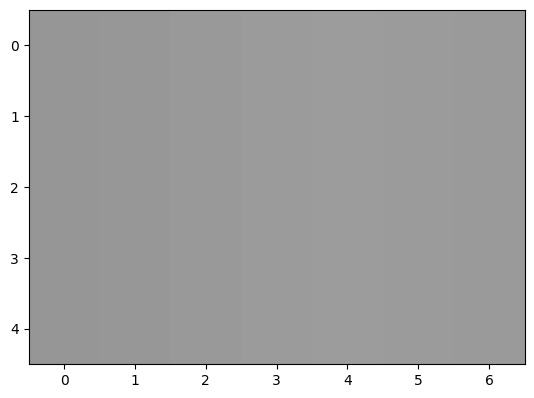

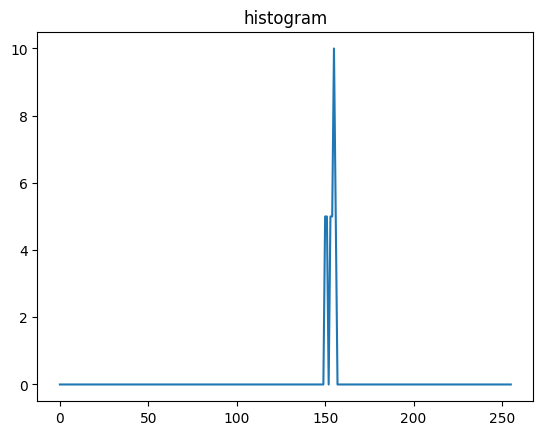

In [10]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1.astype('uint8')))
plt.title('histogram')


In [11]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image ):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
    
  '''
  max_ = np.amax(image)
  min_= np.amin(image)
  
  output_image = image.copy()

 
  for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
      output_image[i, j] = int(((image[i,j] - min_)/(max_ - min_))*255)
      
  

 

  # Start
  
  # End
  return output_image.astype('uint8')


Text(0.5, 1.0, 'new histogram')

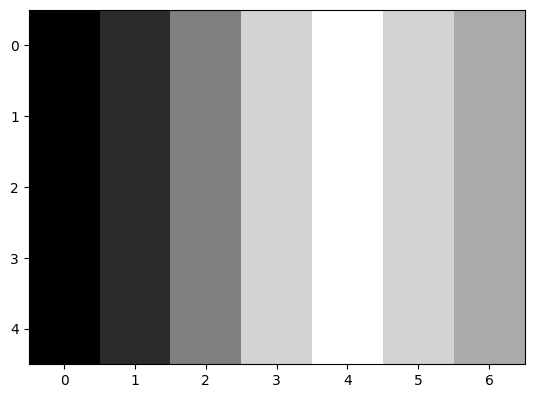

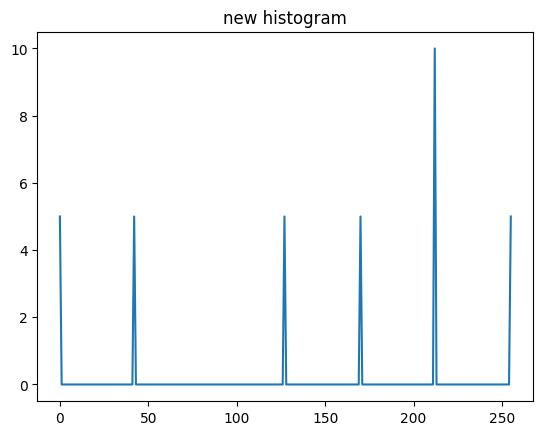

In [12]:
#dont change this cell
plt.imshow(stretch_hist(image1.astype('uint8')),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1.astype('uint8'))))
plt.title('new histogram')

# part3


Text(0.5, 1.0, 'histogram')

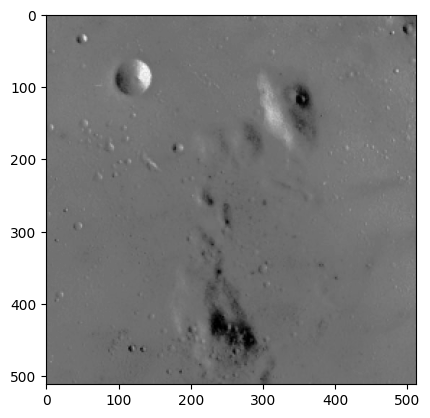

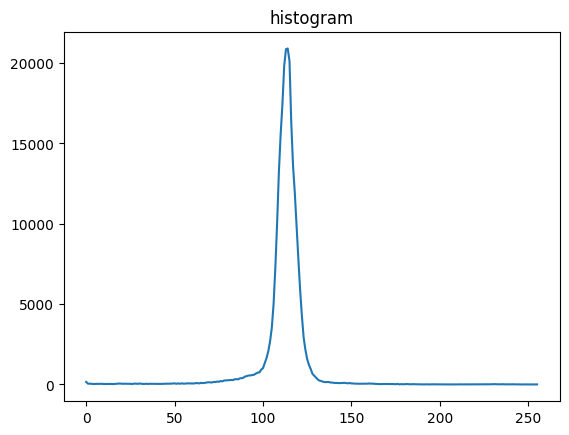

In [13]:
# first read the image and show it.(image2)
image2 = cv2.imread('Q3_image//image2.jpg' , 0)
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)
plt.figure()
histogram_im2 = calc_hist(image2)
plt.plot(calc_hist(image2))
plt.title('histogram')





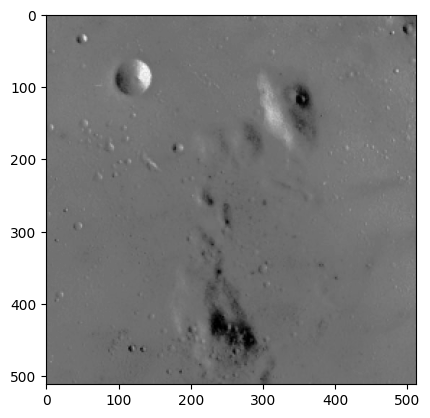

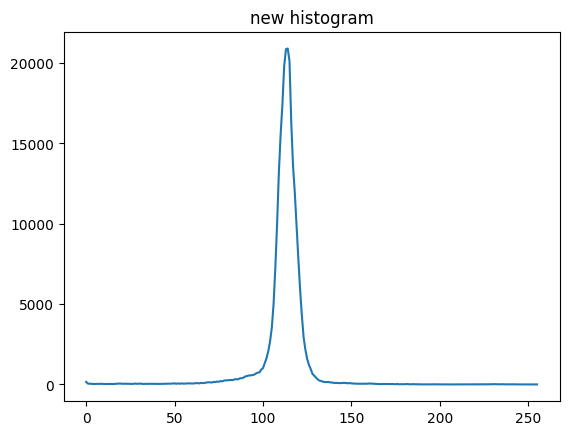

In [14]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')
print()


In [15]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  all_of_pixels = image.shape[0] * image.shape[1]
  sum = 0
  min_i= 0 
  max_i = 0
  sum_reverse = 0
  end_ = False
  end_rev = False
  for i in range (len(histogram_im2)):
    sum += histogram_im2[i]
    sum_reverse += histogram_im2[len(histogram_im2)-1 - i]
    if ( (sum/all_of_pixels)*100 > 2 and not(end_)) : 
      min_i = i
      end_ = True


    if ( (sum_reverse/all_of_pixels)*100 > 2 and not(end_rev)): 
      max_i = len(histogram_im2)-1 - i
      end_rev = True

    if(end_ and end_rev):
      break



  for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
      output_image[i, j] = np.round(((image[i,j] - min_i)/(max_i - min_i))*255)
  
  

    
    

    


  

 
  ############
  # Your code
            
  # End
  ############
  return output_image


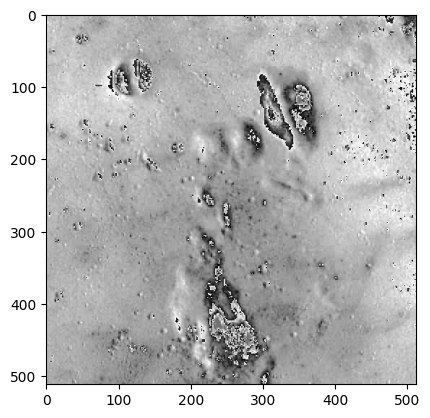

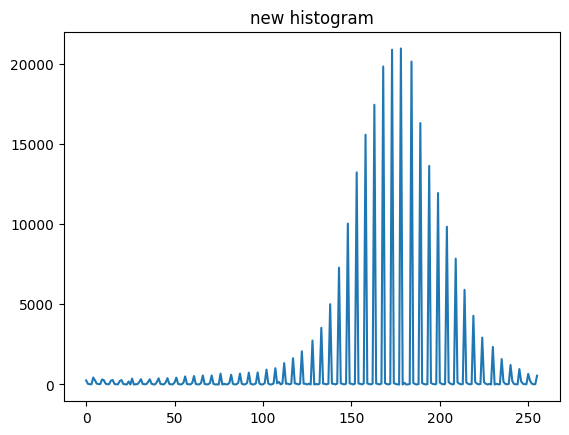

In [16]:
#try your new function and show the result

plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('new histogram')
print()





